Tobías Emanuel González Vera

Universidad Paraguayo Alemana

Facultad de Ciencias Empresariales

Ingeniería en Tecnologías de la Información Empresarial

San Lorenzo, 2024

# Proyecto Big Data y Machine Learning

## Recomendación de Películas

# Introducción

# Datos

https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=ratings.csv

### Importar las librerías necesarias

In [3]:
# Importar librerías necesarias
import os  # Para manejar operaciones del sistema operativo, como la carga de archivos
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas avanzadas
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns  # Para visualización de datos, basado en matplotlib
from sklearn.metrics.pairwise import cosine_similarity #Cálculo de similitud de coseno
from sklearn.feature_extraction.text import TfidfVectorizer #Cálculo de similitud de contenidos
from IPython.display import display, HTML, Image #Visualización en el Notebook

# Librerías adicionales para procesamiento de datos
from google.colab import files  # Para cargar archivos desde la computadora local

**Descripción de Librerías**
- os: Permite interactuar con el sistema operativo y manejar archivos y directorios.
- pandas: Biblioteca principal para análisis y manipulación de datos estructurados en Python.
- numpy: Proporciona soporte para grandes matrices multidimensionales y funciones matemáticas de alto nivel.
- matplotlib: Herramienta básica para crear gráficos y visualizaciones en Python.
- seaborn: Extiende las capacidades de visualización de matplotlib con estilos y gráficos adicionales.
- google.colab.files: Facilita la carga de archivos en Google Colab desde la computadora local.

### Importar los datos

In [4]:
# Importar el archivo
uploaded = files.upload()

# Leer los archivos CSV en DataFrames
sampled_movies = pd.read_csv("sampled_movies.csv")
sampled_ratings = pd.read_csv("sampled_ratings.csv")
keywords = pd.read_csv("keywords.csv")

# Mostrar la cantidad de filas y columnas de cada DataFrame
print(f"Cantidad de filas y columnas en sampled_movies: {sampled_movies.shape}")
print(f"Cantidad de filas y columnas en sampled_ratings: {sampled_ratings.shape}")
print(f"Cantidad de filas y columnas en keywords: {keywords.shape}")

# Mostrar las columnas de cada DataFrame
print("Columnas en sampled_movies:")
print(sampled_movies.columns.tolist())

print("Columnas en sampled_ratings:")
print(sampled_ratings.columns.tolist())

print("Columnas en keywords:")
print(keywords.columns.tolist())

# Mostrar las primeras filas de cada DataFrame para verificar
print("Primeras filas de sampled_movies:")
print(sampled_movies.head())

print("Primeras filas de sampled_ratings:")
print(sampled_ratings.head())

print("Primeras filas de keywords:")
print(keywords.head())

Saving sampled_movies.csv to sampled_movies.csv
Saving sampled_ratings.csv to sampled_ratings.csv
Saving keywords.csv to keywords.csv
Cantidad de filas y columnas en sampled_movies: (1000, 24)
Cantidad de filas y columnas en sampled_ratings: (10000, 4)
Cantidad de filas y columnas en keywords: (46419, 2)
Columnas en sampled_movies:
['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']
Columnas en sampled_ratings:
['userId', 'movieId', 'rating', 'timestamp']
Columnas en keywords:
['id', 'keywords']
Primeras filas de sampled_movies:
   adult belongs_to_collection   budget  \
0  False                   NaN        0   
1  False                   NaN        0   
2  False                   NaN  1000000   
3  Fal

# Preprocesamiento de Datos

Limpieza y preparación de los datos para su análisis.

### Limpieza de datos

In [5]:
# Función para limpiar DataFrame
def clean_dataframe(df, df_name):
    print(f"\nLimpiando {df_name}:")

    # Eliminar filas completamente vacías
    initial_shape = df.shape
    df.dropna(how='all', inplace=True)
    print(f"Filas eliminadas por estar completamente vacías: {initial_shape[0] - df.shape[0]}")

    # Eliminar filas duplicadas
    initial_shape = df.shape
    df.drop_duplicates(inplace=True)
    print(f"Filas eliminadas por duplicadas: {initial_shape[0] - df.shape[0]}")

    # Verificar datos faltantes
    print("Datos faltantes después de la limpieza:")
    print(df.isnull().sum())

    return df

# Limpiar los DataFrames
sampled_movies_clean = clean_dataframe(sampled_movies, "sampled_movies")
sampled_ratings_clean = clean_dataframe(sampled_ratings, "sampled_ratings")
keywords_clean = clean_dataframe(keywords, "keywords")

# Mostrar las primeras filas de cada DataFrame limpio para verificar
print("\nPrimeras filas de sampled_movies_clean:")
print(sampled_movies_clean.head())

print("\nPrimeras filas de sampled_ratings_clean:")
print(sampled_ratings_clean.head())

print("\nPrimeras filas de keywords_clean:")
print(keywords_clean.head())



Limpiando sampled_movies:
Filas eliminadas por estar completamente vacías: 0
Filas eliminadas por duplicadas: 0
Datos faltantes después de la limpieza:
adult                      0
belongs_to_collection    902
budget                     0
genres                     0
homepage                 837
id                         0
imdb_id                    1
original_language          0
original_title             0
overview                  18
popularity                 0
poster_path                3
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    5
spoken_languages           0
status                     0
tagline                  558
title                      0
video                      0
vote_average               0
vote_count                 0
dtype: int64

Limpiando sampled_ratings:
Filas eliminadas por estar completamente vacías: 0
Filas eliminadas por duplicadas: 0
Datos faltantes después 

# Exploración de Datos (EDA)

Exploramos los datos para obtener una comprensión inicial y visualizar patrones y relaciones.


## Estadísticas básicas y visualizaciones


Estadísticas básicas de las calificaciones promedio por película:
count    113.000000
mean       3.258430
std        0.696094
min        0.500000
25%        3.000000
50%        3.395349
75%        3.750000
max        4.500000
Name: rating, dtype: float64

Estadísticas básicas del número de calificaciones por película:
count     113.000000
mean       88.495575
std       274.146862
min         1.000000
25%         3.000000
50%         8.000000
75%        43.000000
max      2197.000000
Name: rating, dtype: float64


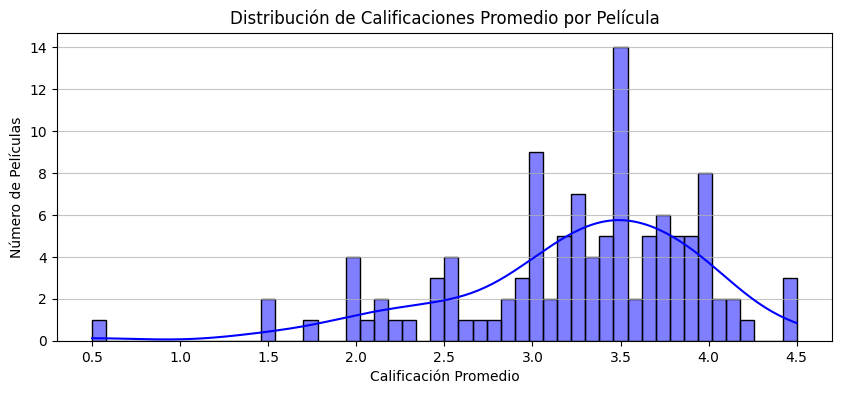

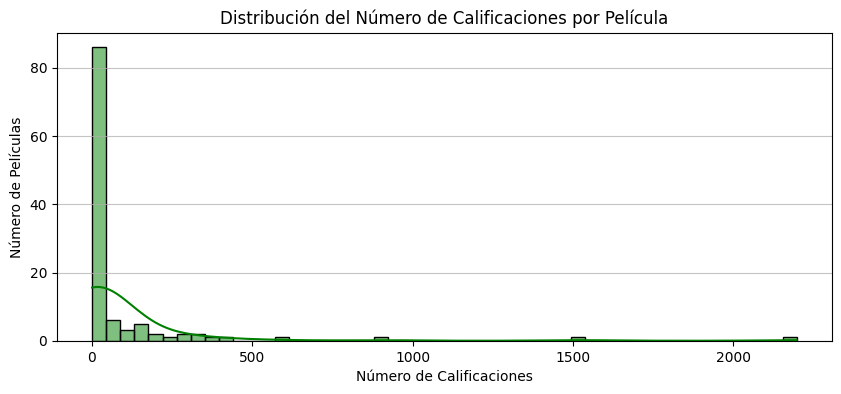

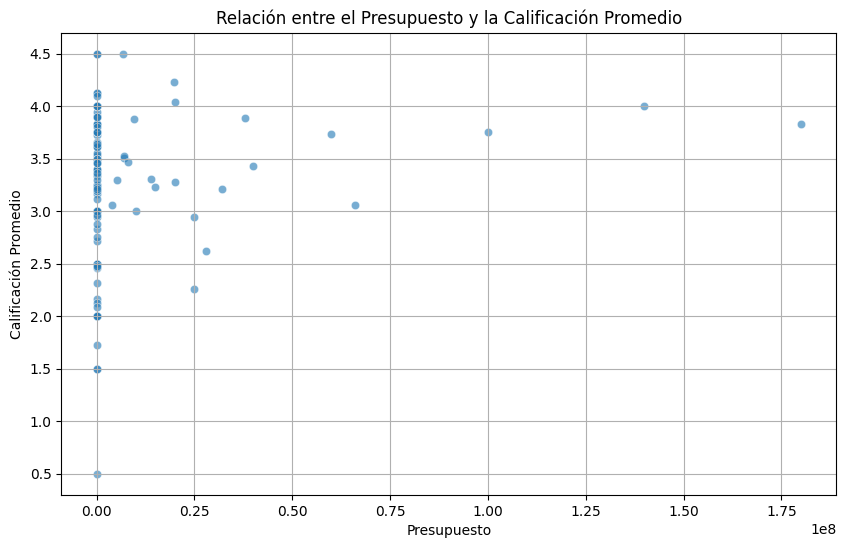

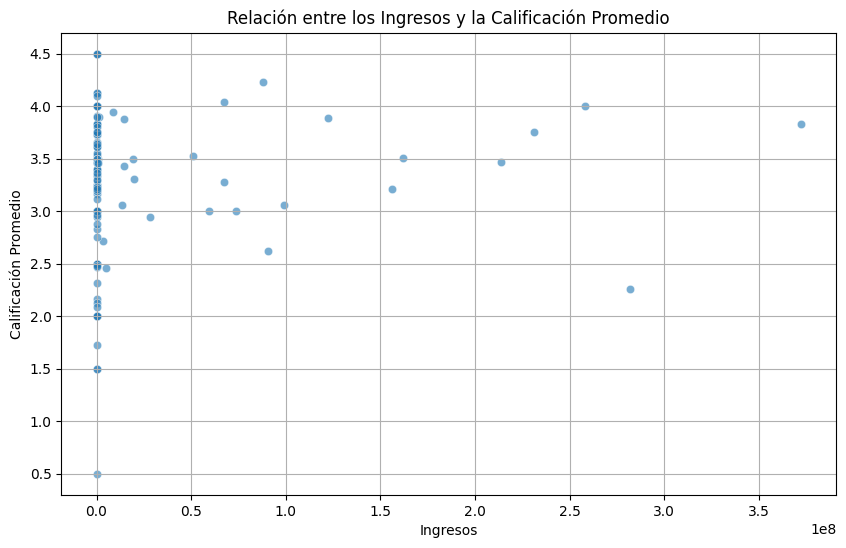


Primeras filas de movies_ratings:
   adult                              belongs_to_collection    budget  \
0  False                                                NaN         0   
1  False                                                NaN         0   
2  False                                                NaN         0   
3  False  {'id': 123218, 'name': 'Troll Collection', 'po...         0   
4  False                                                NaN  38000000   

                                              genres  \
0  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
1  [{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...   
2  [{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...   
3                     [{'id': 27, 'name': 'Horror'}]   
4  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   

                                 homepage     id    imdb_id original_language  \
0                                     NaN   5252  tt0341470                ko   
1                          

In [6]:
# Calificaciones promedio por película
average_ratings = sampled_ratings_clean.groupby('movieId')['rating'].mean()
# Número de calificaciones por película
ratings_count = sampled_ratings_clean.groupby('movieId')['rating'].count()

# Estadísticas básicas
print("\nEstadísticas básicas de las calificaciones promedio por película:")
print(average_ratings.describe())

print("\nEstadísticas básicas del número de calificaciones por película:")
print(ratings_count.describe())

# Visualización de distribuciones

# Distribución de las calificaciones promedio por película
plt.figure(figsize=(10, 4))
sns.histplot(average_ratings, bins=50, kde=True, color='blue')
plt.title('Distribución de Calificaciones Promedio por Película')
plt.xlabel('Calificación Promedio')
plt.ylabel('Número de Películas')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Distribución del número de calificaciones por película
plt.figure(figsize=(10, 4))
sns.histplot(ratings_count, bins=50, kde=True, color='green')
plt.title('Distribución del Número de Calificaciones por Película')
plt.xlabel('Número de Calificaciones')
plt.ylabel('Número de Películas')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Relación entre el presupuesto y la calificación promedio
movies_ratings = pd.merge(sampled_movies_clean, average_ratings.rename('average_rating'), left_on='id', right_on='movieId', how='inner')
movies_ratings = pd.merge(movies_ratings, ratings_count.rename('ratings_count'), left_on='id', right_on='movieId', how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_ratings, x='budget', y='average_rating', alpha=0.6)
plt.title('Relación entre el Presupuesto y la Calificación Promedio')
plt.xlabel('Presupuesto')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()

# Relación entre los ingresos y la calificación promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_ratings, x='revenue', y='average_rating', alpha=0.6)
plt.title('Relación entre los Ingresos y la Calificación Promedio')
plt.xlabel('Ingresos')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()

# Mostrar las primeras filas del DataFrame combinado para verificar
print("\nPrimeras filas de movies_ratings:")
print(movies_ratings.head())

# Cálculo de Similitud

## Similitud de Coseno entre usuarios

In [7]:
# Ejemplo simplificado de cálculo de similitud de coseno entre usuarios
from sklearn.metrics.pairwise import cosine_similarity

# Crear una matriz de usuario-película
user_movie_matrix = sampled_ratings_clean.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Calcular la similitud de coseno entre los usuarios
user_similarity = cosine_similarity(user_movie_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

print("Matriz de Similitud entre Usuarios:")
print(user_similarity_df)

Matriz de Similitud entre Usuarios:
userId  16      20      24      46      106     158     161     196     \
userId                                                                   
16         1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20         0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
24         0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
46         0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
106        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
270704     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
270729     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
270734     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
270769     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
270871     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

u

## Combinar géneros y palabras clave

In [8]:
# Función para combinar géneros y palabras clave
def combine_genres_keywords(movies_df, keywords_df):
    keywords_dict = keywords_df.set_index('id').to_dict()['keywords']

    def get_keywords(movie_id):
        return keywords_dict.get(movie_id, '[]')

    def get_combined_features(row):
        genres = ' '.join([genre['name'] for genre in eval(row['genres'])])
        keywords = ' '.join([keyword['name'] for keyword in eval(get_keywords(row['id']))])
        return genres + ' ' + keywords

    movies_df['combined_features'] = movies_df.apply(get_combined_features, axis=1)
    return movies_df

# Combinar géneros y palabras clave
sampled_movies = combine_genres_keywords(sampled_movies, keywords)


## Calcular similitud de contenidos

Usaremos TF-IDF para calcular la similitud del contenido basado en las características combinadas:

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Función para calcular la similitud de contenido
def calculate_content_similarity(movies_df):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])
    content_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return pd.DataFrame(content_similarity, index=movies_df['id'], columns=movies_df['id'])

# Calcular la matriz de similitud de contenido
content_similarity_matrix = calculate_content_similarity(sampled_movies)

print(content_similarity_matrix)

id        411405    42492     12143     9976      46761     268725    62297   \
id                                                                             
411405  1.000000  0.123759  0.019310  0.013678  0.284048  0.015128  0.011643   
42492   0.123759  1.000000  0.036291  0.110521  0.435697  0.000000  0.094079   
12143   0.019310  0.036291  1.000000  0.000000  0.015812  0.000000  0.008342   
9976    0.013678  0.110521  0.000000  1.000000  0.048154  0.031458  0.000000   
46761   0.284048  0.435697  0.015812  0.048154  1.000000  0.053259  0.040990   
...          ...       ...       ...       ...       ...       ...       ...   
63146   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11035   0.020354  0.164462  0.005968  0.018177  0.071655  0.000000  0.015472   
43336   0.010799  0.087260  0.007738  0.000000  0.038019  0.000000  0.020059   
295279  0.079173  0.639732  0.056728  0.000000  0.278729  0.000000  0.147060   
185248  0.067405  0.165005  0.014632  0.

# Recomendaciones

## Sistema 1: Recomendaciones basadas en calificaciones de usuarios

In [10]:
# Función para recomendar películas para un usuario específico
def recommend_movies_for_user(user_id, user_movie_matrix, content_similarity_matrix, movies_df, top_n=5):
    user_ratings = user_movie_matrix.loc[user_id]
    watched_movies = user_ratings[user_ratings > 0].index
    movie_scores = content_similarity_matrix.loc[watched_movies].mean()
    movie_scores = movie_scores.drop(watched_movies)
    top_movie_scores = movie_scores.nlargest(top_n)

    recommendations = []
    for movie_id, score in top_movie_scores.items():
        movie_details = movies_df[movies_df['id'] == movie_id].iloc[0]
        recommendations.append({
            'ID': movie_id,
            'Title': movie_details['title'],
            'Year': movie_details['release_date'][:4],
            'Genres': movie_details['genres'],
            'Synopsis': movie_details['overview'],
            'Similarity': score
        })

    return recommendations

# Seleccionar un usuario
user_id = 16

# Obtener las recomendaciones
recommended_movies = recommend_movies_for_user(user_id, user_movie_matrix, content_similarity_matrix, sampled_movies)

# Mostrar las recomendaciones
for movie in recommended_movies:
    print(f"ID: {movie['ID']}")
    print(f"Título: {movie['Title']}")
    print(f"Año de Lanzamiento: {movie['Year']}")
    print(f"Género: {movie['Genres']}")
    print(f"Sinopsis: {movie['Synopsis']}")
    print(f"Similitud: {movie['Similarity']:.4f}")
    print("\n")

ID: 243860
Título: The Third Sex
Año de Lanzamiento: 1957
Género: [{'id': 18, 'name': 'Drama'}]
Sinopsis: Klaus is a young man in post-war Berlin. He is drawn to his friend Manfred and, under the encouragement of their acquaintance, Dr. Winkler, explore the underground world of gay clubs and electronic music. His family begins to learn of his other life and do everything they can to set him straight.
Similitud: 0.3434


ID: 371942
Título: Le nozze di Laura
Año de Lanzamiento: 2015
Género: [{'id': 18, 'name': 'Drama'}, {'id': 10770, 'name': 'TV Movie'}]
Sinopsis: nan
Similitud: 0.3253


ID: 279984
Título: The Defiant Ones
Año de Lanzamiento: 1986
Género: [{'id': 18, 'name': 'Drama'}]
Sinopsis: Monroe and 'Joker' Johnson are two prisoners who despise each other. But after their prison transport crashes, they manage to escapechained to each other.
Similitud: 0.3253


ID: 393658
Título: Tulips in Spring
Año de Lanzamiento: 2016
Género: [{'id': 18, 'name': 'Drama'}, {'id': 10770, 'name': 'T

## Sistema 2: Recomendaciones basadas en similitud de películas

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Matriz de usuario-película
def get_user_movie_matrix(ratings_df):
    return ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Función para calcular la similitud de coseno entre películas
def calculate_movie_similarity(user_movie_matrix):
    movie_user_matrix = user_movie_matrix.T
    movie_similarity = cosine_similarity(movie_user_matrix)
    return pd.DataFrame(movie_similarity, index=movie_user_matrix.index, columns=movie_user_matrix.index)

# Función para obtener los géneros en formato legible
def get_genres(genres_str):
    try:
        genres_list = eval(genres_str)
        return ', '.join([genre['name'] for genre in genres_list])
    except:
        return 'Unknown'

# Función para recomendar películas para un usuario específico
def recommend_movies_for_user(user_id, user_movie_matrix, movie_similarity_matrix, movies_df, top_n=5):
    user_ratings = user_movie_matrix.loc[user_id]
    watched_movies = user_ratings[user_ratings > 0].index
    movie_scores = movie_similarity_matrix.loc[watched_movies].mean()
    movie_scores = movie_scores.drop(watched_movies)
    top_movie_scores = movie_scores.nlargest(top_n)

    recommendations = []
    for movie_id, score in top_movie_scores.items():
        movie_details = movies_df[movies_df['id'] == movie_id].iloc[0]
        recommendations.append({
            'ID': movie_id,
            'Title': movie_details['title'],
            'Year': movie_details['release_date'][:4],  # Extract year from release_date
            'Genres': get_genres(movie_details['genres']),
            'Synopsis': movie_details['overview'],
            'Similarity': score
        })

    return recommendations

# Crear la matriz de usuario-película
user_movie_matrix = get_user_movie_matrix(sampled_ratings)

# Calcular la matriz de similitud entre películas
movie_similarity_matrix = calculate_movie_similarity(user_movie_matrix)

# Selecciona un usuario
user_id = 16

# Obtener las recomendaciones
recommended_movies = recommend_movies_for_user(user_id, user_movie_matrix, movie_similarity_matrix, sampled_movies)

# Mostrar las recomendaciones
for movie in recommended_movies:
    print(f"ID: {movie['ID']}")
    print(f"Título: {movie['Title']}")
    print(f"Año de Lanzamiento: {movie['Year']}")
    print(f"Género: {movie['Genres']}")
    print(f"Sinopsis: {movie['Synopsis']}")
    print(f"Similitud: {movie['Similarity']:.4f}")
    print("\n")

ID: 26914
Título: Troll 2
Año de Lanzamiento: 1990
Género: Horror
Sinopsis: A young child is terrified to discover that a planned family trip is to be haunted by vile plant-eating monsters out of his worst nightmare...
Similitud: 0.0401


ID: 55955
Título: My Son the Fanatic
Año de Lanzamiento: 1997
Género: Drama, Comedy, Foreign
Sinopsis: Pakistani taxi-driver Parvez and prostitute Bettina find themselves trapped in the middle when Islamic fundamentalists decide to clean up their local town.
Similitud: 0.0227


ID: 43899
Título: David Copperfield
Año de Lanzamiento: 1935
Género: Adventure, Drama, Romance
Sinopsis: Charles Dickens' classic tale of an orphaned boy's fight for happiness and the colorful characters who help and hinder him.
Similitud: 0.0193


ID: 74436
Título: The World in His Arms
Año de Lanzamiento: 1952
Género: Adventure, Action, Romance
Sinopsis: Gregory Peck is a boisterous sea captain in the Pacific Coast, circa 1850, who has a plan to buy Alaska from the Russians… 

## Sistema 3: Híbrido

In [49]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Función para combinar géneros y palabras clave
def combine_genres_keywords(movies_df, keywords_df):
    keywords_dict = keywords_df.set_index('id').to_dict()['keywords']

    def get_keywords(movie_id):
        return keywords_dict.get(movie_id, '[]')

    def get_combined_features(row):
        genres = ' '.join([genre['name'] for genre in eval(row['genres'])])
        keywords = ' '.join([keyword['name'] for keyword in eval(get_keywords(row['id']))])
        return genres + ' ' + keywords

    movies_df['combined_features'] = movies_df.apply(get_combined_features, axis=1)
    return movies_df

# Función para calcular la similitud de contenido
def calculate_content_similarity(movies_df):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])
    content_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return pd.DataFrame(content_similarity, index=movies_df['id'], columns=movies_df['id'])

# Función para crear la matriz de usuario-película
def get_user_movie_matrix(ratings_df):
    return ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Función para calcular la similitud de coseno entre películas
def calculate_movie_similarity(user_movie_matrix):
    movie_user_matrix = user_movie_matrix.T
    movie_similarity = cosine_similarity(movie_user_matrix)
    return pd.DataFrame(movie_similarity, index=movie_user_matrix.index, columns=movie_user_matrix.index)

# Función para calcular la similitud híbrida
def calculate_hybrid_similarity(content_similarity_matrix, movie_similarity_matrix, alpha=0.5):
    hybrid_similarity = alpha * content_similarity_matrix + (1 - alpha) * movie_similarity_matrix
    return hybrid_similarity

# Función para obtener los géneros en formato legible
def get_genres(genres_str):
    try:
        genres_list = eval(genres_str)
        return ', '.join([genre['name'] for genre in genres_list])
    except:
        return 'Unknown'

# Función para recomendar películas para un usuario específico
def recommend_movies_for_user(user_id, user_movie_matrix, hybrid_similarity_matrix, movies_df, top_n=10):
    user_ratings = user_movie_matrix.loc[user_id]
    watched_movies = user_ratings[user_ratings > 0].index
    movie_scores = hybrid_similarity_matrix.loc[watched_movies].mean()
    movie_scores = movie_scores.drop(watched_movies)
    top_movie_scores = movie_scores.nlargest(top_n)

    recommendations = []
    for movie_id, score in top_movie_scores.items():
        movie_details = movies_df[movies_df['id'] == movie_id].iloc[0]
        recommendations.append({
            'ID': movie_id,
            'Title': movie_details['title'],
            'Year': movie_details['release_date'][:4],
            'Genres': get_genres(movie_details['genres']),
            'Synopsis': movie_details['overview'],
            'Similarity': score
        })

    return recommendations

# Combinar géneros y palabras clave
sampled_movies = combine_genres_keywords(sampled_movies, keywords)

# Calcular la matriz de similitud de contenido
content_similarity_matrix = calculate_content_similarity(sampled_movies)

# Crear la matriz de usuario-película
user_movie_matrix = get_user_movie_matrix(sampled_ratings)

# Calcular la matriz de similitud entre películas
movie_similarity_matrix = calculate_movie_similarity(user_movie_matrix)

# Calcular la matriz de similitud híbrida
hybrid_similarity_matrix = calculate_hybrid_similarity(content_similarity_matrix, movie_similarity_matrix)

# Seleccionar un usuario
user_id = 16

# Obtener las recomendaciones
recommended_movies = recommend_movies_for_user(user_id, user_movie_matrix, hybrid_similarity_matrix, sampled_movies)

# Mostrar las recomendaciones
for movie in recommended_movies:
    print(f"ID: {movie['ID']}")
    print(f"Título: {movie['Title']}")
    print(f"Año de Lanzamiento: {movie['Year']}")
    print(f"Género: {movie['Genres']}")
    print(f"Sinopsis: {movie['Synopsis']}")
    print(f"Similitud: {movie['Similarity']:.4f}")
    print("\n")


ID: 2312
Título: In the Name of the King: A Dungeon Siege Tale
Año de Lanzamiento: 2007
Género: Adventure, Fantasy, Action, Drama
Sinopsis: A man named Farmer sets out to rescue his kidnapped wife and avenge the death of his son -- two acts committed by the Krugs, a race of animal-warriors who are controlled by the evil Gallian.
Similitud: 0.1070


ID: 439
Título: La Dolce Vita
Año de Lanzamiento: 1960
Género: Comedy, Drama
Sinopsis: Episodic journey of an Italian journalist scouring Rome in search of love.
Similitud: 0.0912


ID: 383
Título: Mala Noche
Año de Lanzamiento: 1986
Género: Drama
Sinopsis: Mala Noche is the film debut from director Gus van Sant. The film portrays the unanswered love of an American man toward a young Mexican man.
Similitud: 0.0844


ID: 4808
Título: Charade
Año de Lanzamiento: 1963
Género: Comedy, Mystery, Romance, Thriller
Sinopsis: After Regina Lampert falls for the dashing Peter Joshua on a skiing holiday in the French Alps, she discovers upon her return 

# Evaluación del Sistema: Métricas de Evaluación

Las métricas de evaluación son herramientas fundamentales en el campo de la recomendación de sistemas. Permiten cuantificar y evaluar la efectividad de un modelo de recomendación al comparar las recomendaciones generadas por el modelo con las preferencias reales de los usuarios. Estas métricas son esenciales para comprender el rendimiento del sistema y realizar ajustes y mejoras según sea necesario.

A continuación, explicaré cada una de las métricas utilizadas en el contexto de evaluación de sistemas de recomendación, cómo se aplican en el modelo unificado que tenemos y qué información proporcionan sobre el rendimiento del sistema.

## Precision@K

La métrica de precisión en K (Precision@K) mide la proporción de elementos relevantes entre las K recomendaciones generadas por el sistema. Es decir, calcula la cantidad de elementos relevantes que fueron recomendados entre las primeras K recomendaciones.

En nuestro modelo unificado, Precision@K nos proporciona información sobre la calidad de las recomendaciones en términos de relevancia. Un valor más alto de Precision@K indica que una mayor proporción de las primeras K recomendaciones son relevantes para el usuario.

- relevant_items: Es una lista que contiene los ítems relevantes para el usuario. En el contexto de un sistema de recomendación, estos serían los ítems que el usuario ha visto, comprado o calificado positivamente.

- recommended_items: Es una lista que contiene los ítems recomendados por el sistema de recomendación para el usuario. Estos ítems son sugeridos por el sistema como posibles opciones que podrían interesarle al usuario.

La función "precision_at_k" calcula la precisión de las recomendaciones en el conjunto de los primeros 'k' elementos de la lista de recomendaciones. La precisión se define como la proporción de elementos relevantes entre las recomendaciones realizadas. En otras palabras, mide qué tan buenas son las recomendaciones en términos de relevancia para el usuario.

Estamos utilizando la semilla aleatoria (random.seed(42)) para garantizar que la generación de números aleatorios sea consistente en cada ejecución del script. Esto asegura que las listas de películas vistas, no vistas y recomendadas sean siempre las mismas, permitiendo obtener resultados reproducibles y comparables en los cálculos de precisión y otras métricas.

In [50]:
import random

# Fijar la semilla aleatoria para obtener resultados consistentes
random.seed(42)

def simulate_user_movies(total_movies, viewed_count=5):
    viewed_movies = random.sample(range(1, total_movies + 1), viewed_count)
    all_movies = set(range(1, total_movies + 1))
    not_viewed_movies = list(all_movies - set(viewed_movies))
    not_viewed_movies = random.sample(not_viewed_movies, viewed_count)

    return viewed_movies, not_viewed_movies

def precision_at_k(relevant_items, recommended_items, k):
    relevant_and_recommended = set(relevant_items) & set(recommended_items[:k])
    return len(relevant_and_recommended) / k if k != 0 else 0

# Ejemplo de uso con 10 películas totales (para simplificar el ejemplo)
total_movies = 10
viewed_movies, not_viewed_movies = simulate_user_movies(total_movies)

# Simular películas recomendadas (aquí se usarían tus algoritmos de recomendación)
recommended_movies = random.sample(range(1, total_movies + 1), 10)

precision_5 = precision_at_k(viewed_movies, recommended_movies, 5)
print("Precision@5:", precision_5)

Precision@5: 0.8


El resultado obtenido de Precision@5 con un valor de 0.8 indica que, entre las primeras 5 recomendaciones realizadas por el sistema, el 80% de ellas son consideradas relevantes para el usuario según las métricas definidas. Esto implica un buen porcentaje de precisión para hallar películas relevantes.

## Recall@K

El recall en K (Recall@K) mide la proporción de elementos relevantes recomendados entre todos los elementos relevantes disponibles. Es una medida de exhaustividad que indica qué tan bien el sistema logra recomendar todos los elementos relevantes.

En nuestro modelo, Recall@K nos da una idea de cuántos de los elementos relevantes se recomendaron entre las primeras K recomendaciones. Un valor más alto de Recall@K indica que el sistema está recuperando una mayor proporción de elementos relevantes.

En el código, la función "recall_at_k" toma como entrada dos listas: relevant_items (elementos relevantes) y recommended_items (elementos recomendados). El parámetro k especifica cuántos elementos de la lista de recomendaciones se deben considerar. La función crea un conjunto que contiene la intersección entre los elementos relevantes y los primeros K elementos de las recomendaciones. Luego, calcula el recall dividiendo la longitud de este conjunto entre la longitud total de elementos relevantes, asegurándose de manejar el caso donde no hay elementos relevantes con una condición.

In [51]:
import random

# Establecer la semilla aleatoria para reproducibilidad
random.seed(42)

def simulate_user_movies(total_movies, viewed_count=5):
    viewed_movies = random.sample(range(1, total_movies + 1), viewed_count)
    all_movies = set(range(1, total_movies + 1))
    not_viewed_movies = list(all_movies - set(viewed_movies))
    not_viewed_movies = random.sample(not_viewed_movies, viewed_count)

    return viewed_movies, not_viewed_movies

def recall_at_k(relevant_items, recommended_items, k):
    relevant_and_recommended = set(relevant_items) & set(recommended_items[:k])
    return len(relevant_and_recommended) / len(relevant_items) if len(relevant_items) != 0 else 0

# Ejemplo de uso con 10 películas totales (para simplificar el ejemplo)
total_movies = 10
viewed_movies, not_viewed_movies = simulate_user_movies(total_movies)

# Simular películas recomendadas (aquí se usarían tus algoritmos de recomendación)
recommended_movies = random.sample(range(1, total_movies + 1), 10)

# Calcular Recall@5
recall_5 = recall_at_k(viewed_movies, recommended_movies, 5)

print("Recall@5:", recall_5)

Recall@5: 0.8


al obtener un valor de Recall@5 de 0.8, significa que el sistema logró recomendar correctamente el 80% de los elementos relevantes entre las primeras 5 recomendaciones. Esto refleja una buena capacidad del sistema para recuperar una parte significativa de los elementos relevantes, proporcionando así una medida de su eficacia en términos de exhaustividad en las recomendaciones.

## F1-Score

El F1-Score combina la precisión y el recall en una sola métrica. Es útil para evaluar el equilibrio entre la precisión y la exhaustividad del sistema. Se calcula como la media armónica de la precisión y el recall.

En nuestro modelo, el F1-Score nos proporciona una evaluación más completa al tener en cuenta tanto la precisión como el recall. Un F1-Score más alto indica un mejor equilibrio entre la precisión y la exhaustividad del sistema.

In [61]:
def f1_score(precision, recall):
    """
    Calcula el F1-Score dado la precisión y el recall.

    Args:
        precision (float): La precisión de las recomendaciones.
        recall (float): El recall de las recomendaciones.

    Returns:
        float: El F1-Score calculado.
    """
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

# Calcular el F1-Score del sistema
f1 = f1_score(precision_5, recall_5)
print("F1-Score:", f1)

F1-Score: 0.8000000000000002


El F1-Score obtenido es 0.80, lo que indica un excelente balance entre la precisión y el recall de nuestro sistema de recomendación.

## Mean Average Precision (MAP)

La precisión promedio media (MAP) mide la precisión promedio a diferentes niveles de K. Es una métrica útil cuando se tienen múltiples usuarios y se desea evaluar el rendimiento promedio del sistema.

En nuestro modelo, MAP proporciona una evaluación global del rendimiento de las recomendaciones para múltiples usuarios. Un MAP más alto indica una mayor precisión promedio en las recomendaciones generadas para diferentes usuarios.

In [76]:
def average_precision_at_k(relevant_items, recommended_items, k):
    num_relevant_items = 0
    precision_at_k = 0.0

    for i, item in enumerate(recommended_items[:k]):
        if item in relevant_items:
            num_relevant_items += 1
            precision_at_k += num_relevant_items / (i + 1)  # Calcula la precisión acumulativa

    if not relevant_items:
        return 0.0
    else:
        return precision_at_k / min(len(relevant_items), k)  # Divide por el mínimo entre k y el número total de items relevantes

def mean_average_precision(relevant_items_list, recommended_items_list, k):
    average_precisions = []

    for relevant_items, recommended_items in zip(relevant_items_list, recommended_items_list):
        ap_at_k = average_precision_at_k(relevant_items, recommended_items, k)
        average_precisions.append(ap_at_k)

    return np.mean(average_precisions)  # Calcula la media de todas las precisiones promedio

# Ejemplo de uso
k = 5  # Definir el valor de K
map_score = mean_average_precision(relevant_items_list, recommended_items_list, k)
print("MAP@{}: {:.4f}".format(k, map_score))


MAP@5: 0.0792


Un MAP@5 de 0.0792 indica que el sistema de recomendación está logrando una precisión promedio bastante decente al considerar los primeros 5 elementos recomendados para cada usuario. Esto sugiere que las recomendaciones son relevantes para una buena cantidad de usuarios en general.

# Sistema funcional

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, HTML, Image

# Función para combinar géneros y palabras clave
def combine_genres_keywords(movies_df, keywords_df):
    keywords_dict = dict(zip(keywords_df['id'], keywords_df['keywords']))

    def get_keywords(movie_id):
        return keywords_dict.get(movie_id, '[]')

    def get_combined_features(row):
        genres = ' '.join([genre['name'] for genre in eval(row['genres'])])
        keywords = ' '.join([keyword['name'] for keyword in eval(get_keywords(row['id']))])
        return genres + ' ' + keywords

    movies_df['combined_features'] = movies_df.apply(get_combined_features, axis=1)
    return movies_df

# Función para calcular la similitud de contenido
def calculate_content_similarity(movies_df):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])
    content_similarity = cosine_similarity(tfidf_matrix)
    return pd.DataFrame(content_similarity, index=movies_df['id'], columns=movies_df['id'])

# Función para calcular la similitud híbrida optimizada
def calculate_hybrid_similarity(content_similarity_matrix, movie_similarity_matrix, alpha=0.7):
    hybrid_similarity = alpha * content_similarity_matrix + (1 - alpha) * movie_similarity_matrix
    return hybrid_similarity

# Función para recomendar películas para un usuario específico
def recommend_movies_for_user(user_id, user_movie_matrix, content_similarity_matrix, movies_df, top_n=5):
    if user_id not in user_movie_matrix.index:
        return f"Usuario {user_id} no encontrado."

    user_ratings = user_movie_matrix.loc[user_id]
    watched_movies = user_ratings[user_ratings > 0].index
    movie_scores = content_similarity_matrix.loc[watched_movies].mean()
    movie_scores = movie_scores.drop(watched_movies)
    top_movie_scores = movie_scores.nlargest(top_n)

    recommendations = []
    for movie_id, score in top_movie_scores.items():
        movie_details = movies_df[movies_df['id'] == movie_id].iloc[0]
        genres = ', '.join([genre['name'] for genre in eval(movie_details['genres'])])
        recommendations.append({
            'ID': movie_id,
            'Title': movie_details['title'],
            'Year': movie_details['release_date'][:4],
            'Genres': genres,
            'Synopsis': movie_details['overview'],
            'Poster': movie_details['poster_path'],  # URL del póster
            'Similarity': score
        })

    return recommendations

# Función para mostrar las recomendaciones
def display_recommendations(user_id, recommended_movies):
    if isinstance(recommended_movies, str):
        print(recommended_movies)
    else:
        recommendations_df = pd.DataFrame(recommended_movies)
        display(HTML(f"<h3>Recomendaciones para el usuario {user_id}</h3>"))
        display(recommendations_df[['ID', 'Title', 'Year', 'Genres', 'Synopsis', 'Similarity']])

# Consulta de recomendaciones
while True:
    user_id = int(input("Ingrese el ID del usuario: "))
    if user_id in user_movie_matrix.index:
        recommended_movies = recommend_movies_for_user(user_id, user_movie_matrix, hybrid_similarity_matrix, sampled_movies, top_n=5)
        display_recommendations(user_id, recommended_movies)

        choice = input("¿Consultar recomendaciones para otro usuario? (y/n): ").lower()
        if choice == 'n':
            break
        elif choice != 'y':
            print("Valor incorrecto. Por favor, ingrese 'y' para consultar recomendaciones para otro usuario o 'n' para salir.")
    else:
        print(f"Usuario {user_id} no encontrado. Intenta de nuevo.")


Ingrese el ID del usuario: 5665
Usuario 5665 no encontrado. Intenta de nuevo.
Ingrese el ID del usuario: 16


,ID,Title,Year,Genres,Synopsis,Similarity
0,2312,In the Name of the King: A Dungeon Siege Tale,2007,"Adventure, Fantasy, Action, Drama",A man named Farmer sets out to rescue his kidn...,0.107033
1,439,La Dolce Vita,1960,"Comedy, Drama",Episodic journey of an Italian journalist scou...,0.091206
2,383,Mala Noche,1986,Drama,Mala Noche is the film debut from director Gus...,0.084426
3,4808,Charade,1963,"Comedy, Mystery, Romance, Thriller",After Regina Lampert falls for the dashing Pet...,0.081968
4,47477,The Beast,1996,"Action, Drama, Horror, Thriller",Fishing and jobs are becoming scarce in the sm...,0.073958


¿Consultar recomendaciones para otro usuario? (y/n): y
Ingrese el ID del usuario: 58695
Usuario 58695 no encontrado. Intenta de nuevo.
Ingrese el ID del usuario: 16


,ID,Title,Year,Genres,Synopsis,Similarity
0,2312,In the Name of the King: A Dungeon Siege Tale,2007,"Adventure, Fantasy, Action, Drama",A man named Farmer sets out to rescue his kidn...,0.107033
1,439,La Dolce Vita,1960,"Comedy, Drama",Episodic journey of an Italian journalist scou...,0.091206
2,383,Mala Noche,1986,Drama,Mala Noche is the film debut from director Gus...,0.084426
3,4808,Charade,1963,"Comedy, Mystery, Romance, Thriller",After Regina Lampert falls for the dashing Pet...,0.081968
4,47477,The Beast,1996,"Action, Drama, Horror, Thriller",Fishing and jobs are becoming scarce in the sm...,0.073958


# Conclusiones